# Top2Vec Tutorial

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from top2vec import Top2Vec
np.random.seed(0)

## Read the Data

In [2]:
from sklearn.datasets import fetch_20newsgroups

newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))

In [3]:
newsgroups.data

["\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n",
 'My brother is in the market for a high-performance video card that supports\nVESA local bus with 1-2MB RAM.  Does anyone have suggestions/ideas on:\n\n  - Diamond Stealth Pro Local Bus\n\n  - Orchid Farenheit 1280\n\n  - ATI Graphics Ultra Pro\n\n  - Any other high-per

In [4]:
len(newsgroups.data)

18846

## Training a Top2Vec Model

In [5]:
from top2vec import Top2Vec

model = Top2Vec(newsgroups.data, workers=4, embedding_model='universal-sentence-encoder')

2024-04-13 00:07:09,623 - top2vec - INFO - Pre-processing documents for training
/Users/amol/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
2024-04-13 00:07:20,730 - top2vec - INFO - Downloading universal-sentence-encoder model
2024-04-13 00:07:50,749 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2024-04-13 00:09:31,577 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2024-04-13 00:09:57,594 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2024-04-13 00:09:59,431 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


## Viewing the Number of Topics

In [14]:
model.get_num_topics()

98

## Getting Keywords for Each Topic

In [15]:
model.topic_words

array([['recchi', 'potvin', 'nyr', ..., 'pittsburgh', 'binghamton',
        'pitt'],
       ['diagnosed', 'symptoms', 'diagnosis', ..., 'admitted',
        'contains', 'patents'],
       ['mailing', 'email', 'sending', ..., 'signed', 'domain', 'telnet'],
       ...,
       ['camera', 'cameras', 'lens', ..., 'buyer', 'pov', 'targa'],
       ['marriage', 'married', 'engaged', ..., 'biblical', 'church',
        'sex'],
       ['wolverine', 'liefeld', 'comics', ..., 'copies', 'publishing',
        'powers']], dtype='<U15')

In [16]:
model.topic_words[0]

array(['recchi', 'potvin', 'nyr', 'lemieux', 'nyi', 'lindros', 'nhl',
       'phillies', 'defenseman', 'mets', 'ahl', 'jagr', 'bruins',
       'sabres', 'cubs', 'gretzky', 'alomar', 'pitchers', 'pitching',
       'clemens', 'canucks', 'henrik', 'inning', 'innings', 'oilers',
       'yankees', 'islanders', 'boswell', 'utica', 'braves', 'hockey',
       'rangers', 'leafs', 'wpg', 'flyers', 'baseball', 'sox', 'playoffs',
       'dodgers', 'fuhr', 'goalie', 'espn', 'ulf', 'playoff', 'hawks',
       'batting', 'tampa', 'pittsburgh', 'binghamton', 'pitt'],
      dtype='<U15')

## Creating Topic Wordclouds

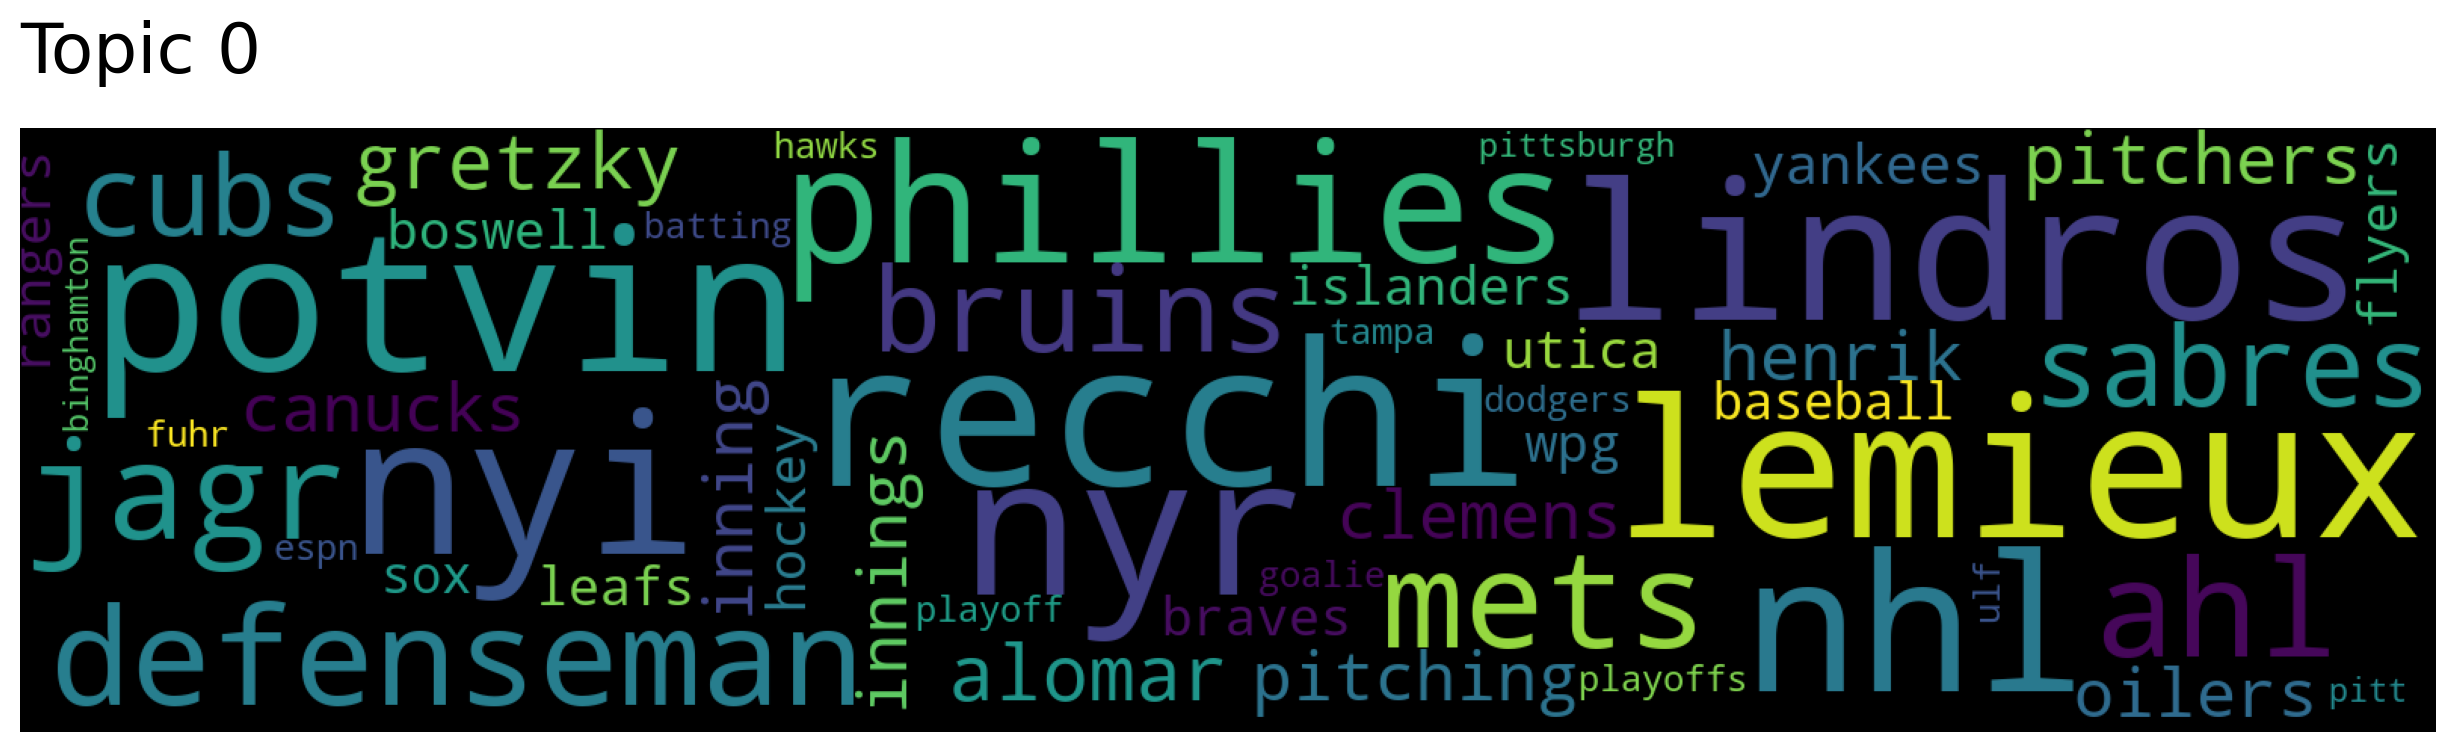

In [17]:
model.generate_topic_wordcloud(0)

## Accessing Topic Vectors

In [18]:
model.topic_vectors

array([[-0.00779375, -0.08654454, -0.05433138, ...,  0.02013372,
        -0.12079872, -0.00057593],
       [-0.04057971, -0.02672733,  0.02302369, ...,  0.07330676,
        -0.06233554, -0.05319171],
       [-0.0186973 , -0.03058651, -0.03546583, ...,  0.03486165,
        -0.0336426 , -0.01660651],
       ...,
       [-0.04872703, -0.06344679, -0.03251521, ...,  0.02610874,
        -0.01127868, -0.07036088],
       [ 0.04197973, -0.04067587, -0.01140145, ...,  0.04493379,
        -0.02363389,  0.04977461],
       [-0.03773658, -0.06648227,  0.05067729, ...,  0.02697629,
         0.07080211, -0.04036857]], dtype=float32)

In [19]:
model.topic_vectors[0]

array([-7.79375108e-03, -8.65445361e-02, -5.43313771e-02, -3.30469646e-02,
        2.05065589e-02,  9.15275700e-03,  1.39096091e-02, -3.76190990e-02,
        2.69750343e-03,  6.14814926e-03, -1.23578481e-01, -1.35588751e-03,
       -4.47018398e-03, -1.39176361e-02,  6.40696008e-03, -2.65924893e-02,
       -3.69269848e-02,  5.39986975e-03,  9.02731344e-03, -1.35561656e-02,
       -2.48157512e-02,  4.24452350e-02, -2.64638439e-02,  3.19493413e-02,
        1.71442721e-02,  2.96351649e-02, -1.95300002e-02, -1.44880079e-02,
        1.09278802e-02,  1.40395248e-02, -7.32103456e-03,  5.23989182e-03,
        2.62135221e-03, -1.88552719e-02, -3.98895033e-02,  3.38163860e-02,
        5.60501125e-03,  4.13702382e-03, -1.57390907e-03, -7.69164860e-02,
        1.33716697e-02, -1.23392409e-02,  4.58126850e-02,  4.65120684e-04,
       -1.00427479e-01, -4.42249328e-03,  3.78364362e-02,  8.02192092e-03,
        4.91993763e-02, -5.59532866e-02,  1.40747398e-01,  2.70963390e-03,
        3.06182466e-02,  

## Searching for Topics by Keyword

In [20]:
topic_words, word_scores, topic_scores, topic_nums = model.search_topics(keywords=["politics"], num_topics=3)

In [21]:
topic_words, topic_scores

([array(['clinton', 'bush', 'president', 'democratic', 'reagan',
         'republicans', 'elected', 'congress', 'wiretap', 'election',
         'johnson', 'politically', 'politicians', 'politics',
         'administration', 'executive', 'political', 'corrupt', 'senate',
         'bill', 'gov', 'democracy', 'ford', 'nuy', 'affairs', 'liar',
         'lib', 'iraq', 'constitutional', 'nist', 'government',
         'libertarian', 'nsa', 'rockefeller', 'secretary', 'weren',
         'bullshit', 'libertarians', 'liberal', 'convention', 'fool',
         'koresh', 'sunos', 'stephanopoulos', 'feds', 'conservative',
         'barry', 'jefferson', 'fascist', 'bullock'], dtype='<U15'),
  array(['um', 'ci', 'oo', 'll', 'ye', 'hmm', 'un', 'uh', 'y_', 'wt', 'on',
         'an', 'uu', 'actually', 'eh', 'way', 'des', 'er', 'se', 'not',
         'has', 'huh', 'of', 'ya', 'so', 'it', 'in', 'le', 'upon', 'one',
         'hm', 'is', 'es', 'at', 'ne', 'what', 'au', 'no', 'shut', 'mm',
         'est', 'dont'

## Searching for Documents by Topic

In [22]:
model.search_documents_by_topic(0, num_docs=1)

(array(['\nI think this guy is going to be just a little bit disappointed.  Lemieux\ntwo, Tocchet, Mullen, Tippett, and Jagr.  I buzzed my friend because I forgot\nwho had scored Mullen\'s goal.  I said, "Who scored?  Lemieux two, Tocchet,\nTippett, Jagr."  The funny part was I said the "Jagr" part non-chalantly as\nhe was in the process of scoring while I was asking this question!!! :-)\n\nAll in all ABC\'s coverage wasn\'t bad.  On a scale of 1-10, I give it about\nan 8.  How were the games in the Chi/St. Louis/LA area???\n\n\nThat\'s stupid!!!  I\'d complain to the television network!  If I were to even\nsee a Pirates game on instead of a Penguins game at this time of the year, I\nand many other Pittsburghers would surely raise hell!!!\n\n\nTexas is off to a good start, they may pull it out this year.  Whoops!  That\nbelongs in rec.sport.baseball!!!'],
       dtype=object),
 array([0.75282836], dtype=float32),
 array([12405]))

## Using the Model's Embedding Function

In [23]:
embedding_vector = model.embed(["This is a fake news article."])
embedding_vector.shape

TensorShape([1, 512])

## Reducing the Number of Topics

In [24]:
topic_mapping = model.hierarchical_topic_reduction(num_topics=20)

In [25]:
topic_mapping[1]

[24, 61, 36, 41, 59, 31, 69, 22, 77, 89, 92, 44, 70, 35, 86, 49, 14]

In [26]:
model.topic_words_reduced[1]

array(['irq', 'scsi', 'maxtor', 'cmos', 'motherboard', 'dma', 'mhz',
       'processor', 'ati', 'risc', 'sgi', 'cpu', 'vga', 'floppies',
       'processors', 'cdrom', 'baud', 'vms', 'seagate', 'bios', 'packard',
       'powerbook', 'hardware', 'msdos', 'modems', 'vesa', 'ansi', 'vram',
       'bsd', 'deskjet', 'monitor', 'computer', 'xt', 'oscillator',
       'ieee', 'byte', 'floppy', 'ibm', 'bandwidth', 'ram', 'driver',
       'ethernet', 'disk', 'intel', 'workstation', 'bytes', 'mov',
       'drivers', 'telnet', 'printer'], dtype='<U15')